Loading dataset...

✅ Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

✅ First 5 Rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no   

C:\Development\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hafsa Khurram\AppData\Local\Temp\ipykernel_8284\3041991625.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm", legend=False)



✅ Logistic Regression Accuracy: 0.7156
Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.73      0.77        44
         Low       0.85      0.74      0.79        39
      Medium       0.47      0.65      0.55        26

    accuracy                           0.72       109
   macro avg       0.72      0.71      0.70       109
weighted avg       0.75      0.72      0.73       109



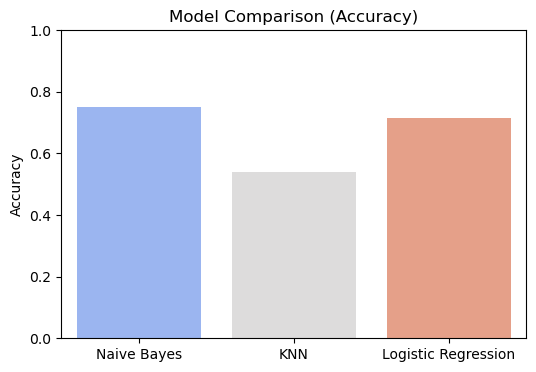

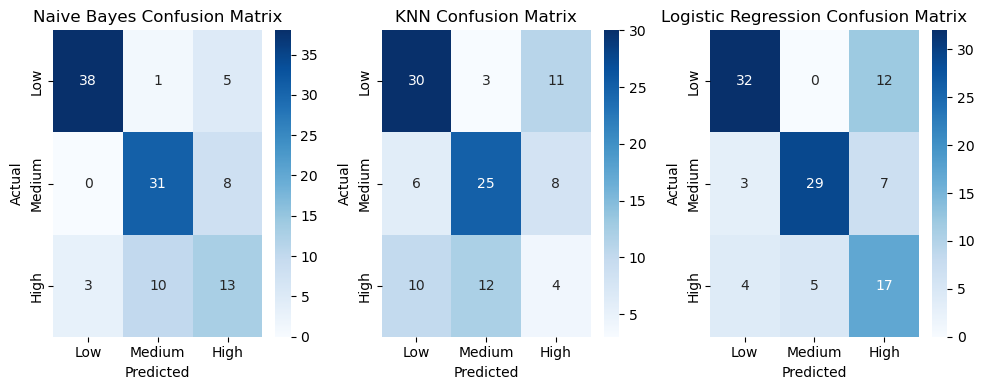

C:\Development\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but LogisticRegression is expecting 13 features as input.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Load Dataset
# -------------------------
print("Loading dataset...")
df = pd.read_csv("Housing.csv")

print("\n✅ Columns:", df.columns.tolist())
print("\n✅ First 5 Rows:\n", df.head())

# -------------------------
# 2. Preprocess
# -------------------------
df = df.dropna()

# Convert price to 3 categories (Low, Medium, High)
df['Price_Category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Define features and target
X = df.drop(['price', 'Price_Category'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Price_Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 3. Train Models
# -------------------------
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    print(f"\n✅ {name} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# -------------------------
# 4. Graph - Accuracy Comparison
# -------------------------
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm", legend=False)
plt.title("Model Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

# -------------------------
# 5. Confusion Matrices
# -------------------------
plt.figure(figsize=(10,4))
for i, (name, cm) in enumerate(conf_matrices.items()):
    plt.subplot(1,3,i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# -------------------------
# 6. Predict New Data Example
# -------------------------
# Example input (must match number/order of features in X)
example_data = np.array([3000, 3, 2, 1]).reshape(1, -1)
predicted_category = models["Logistic Regression"].predict(example_data)
print("\n🏷️ Predicted Price Category:", predicted_category[0])
